In [258]:
#%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import os
import glob
from os import walk
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.gridspec import GridSpec
from IPython.display import display, clear_output
from labexp import experiments

from mpl_toolkits.axes_grid1 import make_axes_locatable,ImageGrid
from mpl_toolkits.axes_grid1 import AxesGrid
from matplotlib.gridspec import GridSpec
plt.style.use('/media/labfiles/lab-codes/plot-styles/plotstyle.mplstyle')

In [259]:
exp3 = experiments(1,'nano','nsom','grating_InP')

|  No. Dir  | Name Dir                                         |  No. files  |
|-----------|--------------------------------------------------|-------------|
|     0     | nano/grating_InP/exp_2022-04/exp_2022_15_04_nsom |      1      |


In [260]:
#exp1=exp3.data[11][:,1:].T;

lc=exp3.data[0][0][:,:,1].T
mul=-exp3.data[0][0][:,:,2].T
divr=lc-mul
afm = exp3.data[0][0][:,:,0].T

# First image without correction

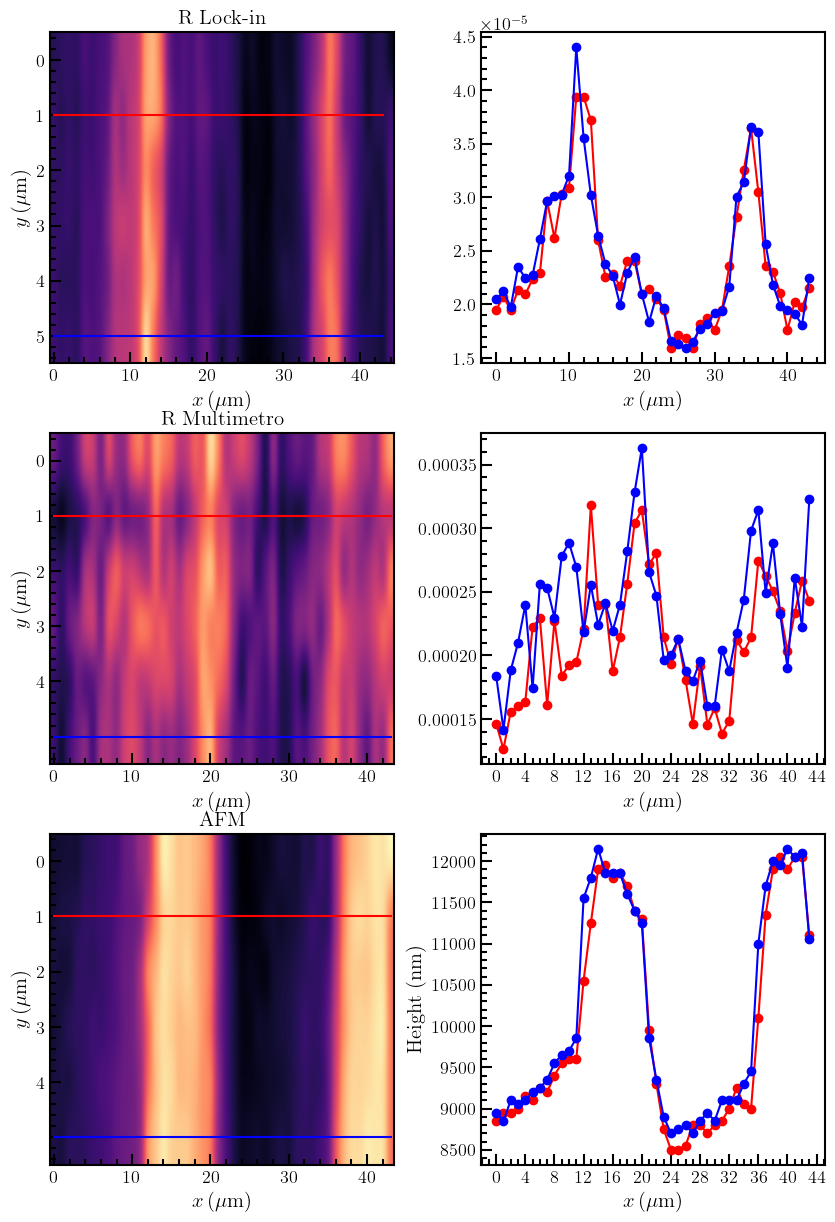

In [285]:
fig = plt.figure(figsize=(10, 15))
gs = GridSpec(3, 2, figure=fig,wspace=0.25,hspace=0.21,width_ratios=[1,1])
ax1 = fig.add_subplot(gs[0, 0])
ax =fig.add_subplot(gs[0, 1])
ax2 =fig.add_subplot(gs[1, 0])
ax3 =fig.add_subplot(gs[1, 1])
ax4 =fig.add_subplot(gs[2, 0])
ax5 =fig.add_subplot(gs[2, 1])
npix1=1
npix2=5
#npix3=3
ax1.set_title("R Lock-in")
ax1.imshow(lc,cmap='magma',aspect='auto',interpolation='gaussian')
ax1.plot([0,43],[npix1,npix1],'r')
ax1.plot([0,43],[npix2,npix2],'b')
#ax1.plot([0,10],[npix3,npix3],'k')
ax1.set_xlabel(r"$x\,(\mu$m)")
'''
ax1.set_xticks(np.arange(0,45,4))
ax1.set_xticklabels(np.arange(0,90,8))
'''
ax1.set_ylabel(r"$y\,(\mu$m)")


ax.set_xlabel(" $x\,(\mu$m)")
#ax.set_ylabel(r"Height (nm)")
ax.plot(lc[npix1,1:],'o-r')
ax.plot(lc[npix2,1:],'o-b')





# R
ax2.set_title("R Multimetro")
ax2.imshow(mul[:,1:],cmap='magma',aspect='auto',interpolation='gaussian')
ax2.plot([0,43],[npix1,npix1],'r')
ax2.plot([0,43],[npix2,npix2],'b')
#ax1.plot([0,10],[npix3,npix3],'k')
ax2.set_xlabel(r"$x\,(\mu$m)")
'''
ax1.set_xticks(np.arange(0,45,4))
ax1.set_xticklabels(np.arange(0,90,8))
'''
ax2.set_ylabel(r"$y\,(\mu$m)")

ax2.set_yticks(np.arange(0,5,1))
ax2.set_yticklabels(np.arange(0,5,1))

ax3.set_xlabel(" $x\,(\mu$m)")
ax3.set_xticks(np.arange(0,45,4))
ax3.set_xticklabels(np.arange(0,45,4))
# ax3.set_ylabel(r"Height (nm)")
ax3.plot(mul[npix1,1:],'o-r')
ax3.plot(mul[npix2,1:],'o-b')



# afm
ax4.set_title("AFM")
ax4.imshow(afm[:,1:],cmap='magma',aspect='auto',interpolation='gaussian')
ax4.plot([0,43],[npix1,npix1],'r')
ax4.plot([0,43],[npix2,npix2],'b')
#ax1.plot([0,10],[npix3,npix3],'k')
ax4.set_xlabel(r"$x\,(\mu$m)")
'''
ax1.set_xticks(np.arange(0,45,4))
ax1.set_xticklabels(np.arange(0,90,8))
'''
ax4.set_ylabel(r"$y\,(\mu$m)")

ax4.set_yticks(np.arange(0,5,1))
ax4.set_yticklabels(np.arange(0,5,1))

ax5.set_xlabel(" $x\,(\mu$m)")
ax5.set_xticks(np.arange(0,45,4))
ax5.set_xticklabels(np.arange(0,45,4))
ax5.set_ylabel(r"Height (nm)")
ax5.plot(afm[npix1,1:],'o-r')
ax5.plot(afm[npix2,1:],'o-b')



plt.show()

In [273]:
ax1.get_yticklabels()

[Text(0, -1.0, '$\\mathdefault{−1}$'),
 Text(0, 0.0, '$\\mathdefault{0}$'),
 Text(0, 1.0, '$\\mathdefault{1}$'),
 Text(0, 2.0, '$\\mathdefault{2}$'),
 Text(0, 3.0, '$\\mathdefault{3}$'),
 Text(0, 4.0, '$\\mathdefault{4}$'),
 Text(0, 5.0, '$\\mathdefault{5}$'),
 Text(0, 6.0, '$\\mathdefault{6}$')]

In [277]:
labels = [item.get_text() for item in ax1.get_yticklabels()]
c=0
for i in range(len(labels)):
    print(i)
    labels[i]= i+c
    c+=2-1
labels

0
1
2
3
4
5
6
7


[0, 2, 4, 6, 8, 10, 12, 14]

In [281]:
def lbls(axx,step,vtype='x'):
    c=0
    if vtype=='x':
        labels = [item.get_text() for item in axx.get_xticklabels()]
    elif vtype=='y':
        labels = [item.get_text() for item in axx.get_yticklabels()]
    for i in range(len(labels)):
        labels[i]= i+c
        c+=step-1    
    return np.array(labels)


lbls(ax1,2,vtype='y')

array([ 0,  2,  4,  6,  8, 10, 12, 14])

In [243]:
labels = [item.get_text() for item in ax.get_xticklabels()]
labels

['$\\mathdefault{−10}$',
 '$\\mathdefault{0}$',
 '$\\mathdefault{10}$',
 '$\\mathdefault{20}$',
 '$\\mathdefault{30}$',
 '$\\mathdefault{40}$',
 '$\\mathdefault{50}$']

In [54]:
xi=0;xf=exp1.shape[1]
yi=0;yf=exp1.shape[0]
nx, ny = exp1.shape[1], exp1.shape[0]
X, Y = np.meshgrid(np.arange(0, nx, 1), np.arange(0, ny, 1))
Z1   =  exp1[yi:yf,xi:xf]

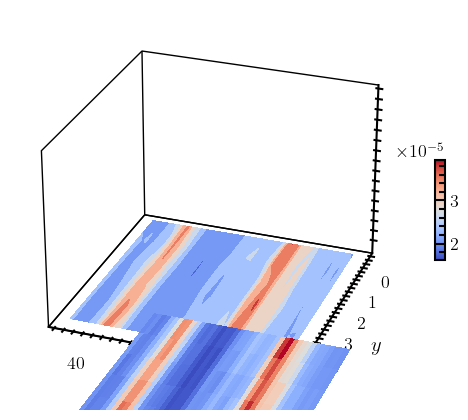

In [55]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(5,5))
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

#fig.canvas.layout.width = '100%'
#fig.canvas.layout.height = '500px'
ax = plt.axes(projection='3d')
surf=ax.plot_surface(X, Y,Z1,cmap=cm.coolwarm, linewidth=1, antialiased=False)
ax.grid(False)

ax.xaxis.pane.set_edgecolor('#000000')
ax.xaxis.pane.set_linewidth(1)
ax.yaxis.pane.set_edgecolor('#000000')
ax.yaxis.pane.set_linewidth(1)
ax.zaxis.pane.set_edgecolor('#000000')
ax.zaxis.pane.set_linewidth(1)

ax.xaxis.pane.set_alpha(1)
ax.yaxis.pane.set_alpha(1)
ax.zaxis.pane.set_alpha(1)

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.set_zticklabels([])
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.view_init(azim=110,elev=27)

ax.contourf(X, Y,Z1,zdir='z',cmap=cm.coolwarm,offset=5000)
#ax.set_xlim(0,45)
#ax.set_ylim(0,7)

ax.set_zlim(5000,13000)

fig.colorbar(surf, shrink=0.2, aspect=10)

plt.show()
